In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('HD_Cleveland_Data_Clean.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,N
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Y
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,Y
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,N
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
age         297 non-null int64
sex         297 non-null int64
cp          297 non-null int64
trestbps    297 non-null int64
chol        297 non-null int64
fbs         297 non-null int64
restecg     297 non-null int64
thalach     297 non-null int64
exang       297 non-null int64
oldpeak     297 non-null float64
slop        297 non-null int64
ca          297 non-null int64
thal        297 non-null int64
target      297 non-null object
dtypes: float64(1), int64(12), object(1)
memory usage: 32.6+ KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


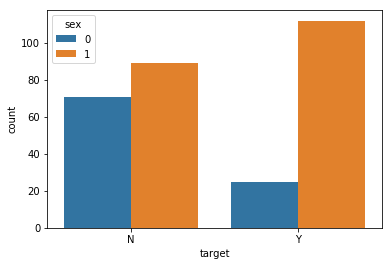

In [15]:
sns.countplot(x='target',data = df,hue='sex')

In [12]:
df['target'].value_counts()

N    160
Y    137
Name: target, dtype: int64

In [14]:
df[['target','sex']].groupby('sex').count()

,target
sex,
0,96
1,201


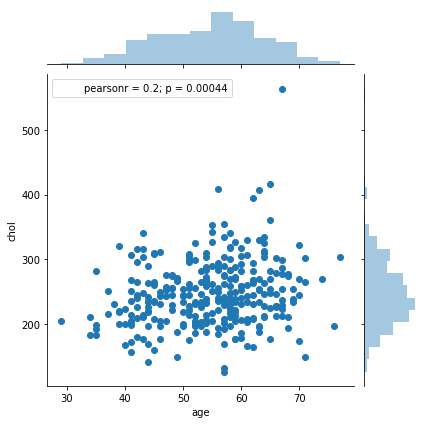

In [17]:
sns.jointplot(x='age', y='chol', data=df)

AttributeError: 'AxesSubplot' object has no attribute 'corr'

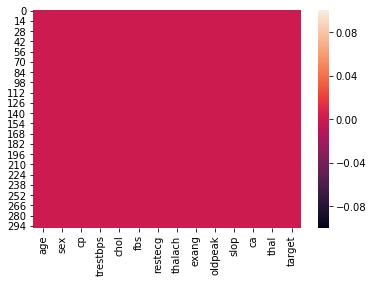

In [21]:
sns.heatmap(data=pd.isnull(df)).corr(df['target'])

In [22]:
from sklearn.model_selection import train_test_split

In [29]:
X=df.drop('target',axis=1)

In [30]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3


In [31]:
y=df['target']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [34]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal
266,61,1,4,140,207,0,2,138,1,1.9,1,1,7
37,57,1,4,150,276,0,2,112,1,0.6,2,1,6
16,48,1,2,110,229,0,0,168,0,1.0,3,0,7
253,67,0,4,106,223,0,0,142,0,0.3,1,2,3
144,47,1,3,108,243,0,0,152,0,0.0,1,0,3


In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dtree =DecisionTreeClassifier()

In [38]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
y_pred = dtree.predict(X_test)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          N       0.75      0.73      0.74        49
          Y       0.69      0.71      0.70        41

avg / total       0.72      0.72      0.72        90



In [43]:
print(confusion_matrix(y_test,y_pred))

[[36 13]
 [12 29]]


In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rForest = RandomForestClassifier(n_estimators=100)

In [46]:
rForest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
y_perd2 = rForest.predict(X_test)

In [58]:
print(classification_report(y_test,y_perd2))

             precision    recall  f1-score   support

          N       0.85      0.90      0.87        49
          Y       0.87      0.80      0.84        41

avg / total       0.86      0.86      0.85        90



In [61]:
print(confusion_matrix(y_test,y_perd2))

[[44  5]
 [ 8 33]]
